<h1> Preprocessing Data </h1>

<h2> Import necessary libraries </h2>

In [61]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

<h2>Read raw data from file <font color="blue">"steam_game.csv" </font></h2>


In [62]:
df = pd.read_csv('steam_game.csv')
df.head(10)

,Title,Genre,Tags,withDLC,isMature,Franchise,ReleaseDate,Developer,Publisher,Languages,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent
0,Endless Monday: Dreams and Deadlines,"Adventure, Indie","Visual Novel, Choose Your Own Adventure, Inter...",False,False,Endless Monday,"4 May, 2023",hcnone,hcnone,"English, Japanese",737,737,0.0,"142.000,00₫",NaN
1,Senren＊Banka,"Adventure, Casual","Visual Novel, NSFW, Casual, Dating Sim, Anime,...",False,True,NaN,"14 Feb, 2020",YUZUSOFT,HIKARI FIELD,"English, Japanese, Simplified Chinese, Traditi...","(17,148)","(17,298)",150.0,"280.000,00₫",NaN
2,A Short Hike,"Adventure, Indie","Exploration, Adventure, Relaxing, Cute, Indie,...",False,False,NaN,"30 Jul, 2019",adamgryu,adamgryu,"English, French, Spanish - Latin America, Japa...","(14,772)","(14,884)",112.0,"100.000,00₫",NaN
3,Aseprite,"Animation & Modeling, Design & Illustration, G...","Pixel Graphics, Design & Illustration, Animati...",False,False,NaN,"22 Feb, 2016",David Capello,Igara Studio,English,"(15,565)","(15,693)",128.0,"188.000,00₫",NaN
4,Cats Hidden in Paris,"Casual, Indie, Free to Play","Cats, Hidden Object, Puzzle, Wholesome, Relaxi...",True,False,Travellin Cats,"16 Jul, 2023",Travellin Cats,Travellin Cats,"English, French, Italian, German, Spanish - Sp...","(12,039)","(12,144)",105.0,Free,NaN
5,Papa's Freezeria Deluxe,"Action, Casual, Indie, Simulation, Strategy","Cooking, Time Management, Simulation, Casual, ...",False,False,Papa Louie,"31 Mar, 2023",Flipline Studios,Flipline Studios,English,"(6,514)","(6,562)",48.0,"87.500,00₫",NaN
6,Cats Hidden in Jingle Jam,"Casual, Indie, Free to Play","Free to Play, Cats, Hidden Object, Wholesome, ...",False,False,Travellin Cats,"1 Dec, 2023",Travellin Cats,Travellin Cats,"English, French, Italian, German, Spanish - Sp...","(5,097)","(5,108)",11.0,Free,NaN
7,An Arcade Full of Cats,"Casual, Indie, Free to Play","Cats, Hidden Object, Relaxing, Wholesome, Puzz...",True,False,Devcats,"16 Nov, 2023",Devcats,Devcats,"English, French, Italian, German, Spanish - Sp...","(3,018)","(3,045)",27.0,Free,NaN
8,Ib,"Adventure, Indie","Horror, 2D, RPGMaker, Psychological Horror, Pi...",False,False,PLAYISM,"11 Apr, 2022",kouri,PLAYISM,"English, Japanese, Simplified Chinese, Traditi...","(3,068)","(3,098)",30.0,"150.000,00₫",NaN
9,Lil Gator Game,"Action, Adventure, Casual, Indie","Casual, Cozy, Relaxing, Cute, Wholesome, Famil...",False,False,Playtonic Friends,"14 Dec, 2022",MegaWobble,Playtonic Friends,"English, French, German, Portuguese - Brazil, ...","(3,363)","(3,395)",32.0,"260.000,00₫",NaN


<h2>Ta xem xét có tổng cộng bao nhiêu hàng và cột thuộc tính ở tập dữ liệu thô </h2>
Nếu dữ liệu có trên 1000 dòng và phải có trên 5 cột thuộc tính thì dữ liệu mới đủ để tiến hành các bước khai thác, xây dựng mô hình học máy, học sâu, ... 

Ngược lại, dữ liệu quá ít, không đủ -> cần thu thập thêm dữ liệu

In [63]:
num_rows, num_cols = df.shape
print(f'Current shape of data: {df.shape}')
if (num_rows > 100) & (num_cols > 5):
    print('Data is good !')
else:
    print('You should collect more data')

Current shape of data: (4841, 15)
Data is good !


### Ta xem xét ý nghĩa của từng cột dữ liệu
1. Title: Tên trò chơi điện tử trên website steam
2. Genre: Thể loại trò chơi
3. Tags: các nhãn trò chơi mà người dùng(người chơi) gắn cho trò chơi
4. withDLC: trò chơi có kèm theo các downloadable content hay không ?	
5. isMature: trò chơi có được gán nhãn không phù hợp cho trẻ nhỏ hay không?
6. Franchise: tên thương hiệu của trò chơi	
7. ReleaseDate: Ngày phát hành của trò chơi	
8. Developer: Nhà phát triển trò chơi	
9. Publisher: Nhà phát hành trò chơi
10. Languages: Các ngôn ngữ được hỗ trợ trong trò chơi	
11. PositiveReviews: Số đánh giá tích cực về trò chơi	
12. TotalReviews: Tổng số đánh giá của người chơi về trò chơi
13. NegativeReviews: Số đánh giá tiêu cực về trò chơi
14. OriginalPrice: Giá bán gốc của trò chơi
15. DiscountPercent: Giảm giá áp dụng trên giá gốc(%)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4841 entries, 0 to 4840
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            4033 non-null   object
 1   Genre            4024 non-null   object
 2   Tags             4033 non-null   object
 3   withDLC          4033 non-null   object
 4   isMature         4033 non-null   object
 5   Franchise        2054 non-null   object
 6   ReleaseDate      4030 non-null   object
 7   Developer        4032 non-null   object
 8   Publisher        4021 non-null   object
 9   Languages        4033 non-null   object
 10  PositiveReviews  4033 non-null   object
 11  TotalReviews     4033 non-null   object
 12  NegativeReviews  4033 non-null   object
 13  OriginalPrice    4841 non-null   object
 14  DiscountPercent  1376 non-null   object
dtypes: object(15)
memory usage: 567.4+ KB


Kiểm tra xem mỗi feature chiếm nhiêu % missing value:

In [65]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Title              16.690766
Genre              16.876678
Tags               16.690766
withDLC            16.690766
isMature           16.690766
Franchise          57.570750
ReleaseDate        16.752737
Developer          16.711423
Publisher          16.938649
Languages          16.690766
PositiveReviews    16.690766
TotalReviews       16.690766
NegativeReviews    16.690766
OriginalPrice       0.000000
DiscountPercent    71.576121
dtype: float64

##### Loại bỏ những dòng dữ liệu có *"Title"* là Nan value

In [66]:
df.dropna(subset = ['Title'], inplace = True)

In [67]:
if df['Title'].isna().sum() == 0:
    print('Column Title is now good !')

Column Title is now good !


##### Có thể thấy số giá bị thiếu ở cột *DiscountPercent* là quá nhiều (hơn 90%) nên ta sẽ tính lại giá trị ở cột *OriginalPrice* sau khi đã áp dụng giảm giá, đổi tên thành *Price* và xóa đi cột *DiscountPercent* 

##### Trước hết, ta sẽ chuyển tất cả giá trị với đơn vị tiền tệ "$" sang "VND", tiến hàng loại bỏ kí tự hiển thị đơn vị tiền tệ, đưa giá trị "Free" thành 0 ở cột *OriginalPrice*

In [68]:
def convert_price(price):
    if price == "Free":
        return 0.0
    elif '₫' in price:
        formatted_price = float(price[: -4].replace('₫', '').replace('.', '').replace(',', ''))
        return round(formatted_price, 2)
    elif '$' in price:
        usd_to_vnd = 24265
        formatted_price =  float(price.replace('$', '')) * usd_to_vnd
        return round(formatted_price, 2)

df['OriginalPrice'] = df['OriginalPrice'].apply(convert_price) 

In [69]:
# for price in df['OriginalPrice']:
#     print(price)

In [70]:
def convert_discount(discount):
    if pd.isna(discount):
        return 0
    else:
        return float(discount.replace('-', '').replace('%', '')) * 0.01

df['DiscountPercent'] = df['DiscountPercent'].apply(convert_discount)

In [71]:
# for discount in df['DiscountPercent']:
#     print(discount)

In [72]:
def price_after_discount(x):
    discount_percent = x['DiscountPercent']
    if pd.isna(discount_percent):
        return x['OriginalPrice']
    else:
        return x['OriginalPrice'] * (1 - discount_percent)

df['DiscountedPrice'] = df.apply(price_after_discount, axis = 1)

In [73]:
df['DiscountedPrice']

0       142000.0
1       280000.0
2       100000.0
3       188000.0
4            0.0
          ...   
4827    170000.0
4828     59000.0
4832    137350.0
4834    131600.0
4835    439000.0
Name: DiscountedPrice, Length: 4033, dtype: float64

In [74]:
# df.drop(columns = ['DiscountPercent'], inplace = True)
df.head(20)

,Title,Genre,Tags,withDLC,isMature,Franchise,ReleaseDate,Developer,Publisher,Languages,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent,DiscountedPrice
0,Endless Monday: Dreams and Deadlines,"Adventure, Indie","Visual Novel, Choose Your Own Adventure, Inter...",False,False,Endless Monday,"4 May, 2023",hcnone,hcnone,"English, Japanese",737,737,0.0,142000.0,0.0,142000.0
1,Senren＊Banka,"Adventure, Casual","Visual Novel, NSFW, Casual, Dating Sim, Anime,...",False,True,NaN,"14 Feb, 2020",YUZUSOFT,HIKARI FIELD,"English, Japanese, Simplified Chinese, Traditi...","(17,148)","(17,298)",150.0,280000.0,0.0,280000.0
2,A Short Hike,"Adventure, Indie","Exploration, Adventure, Relaxing, Cute, Indie,...",False,False,NaN,"30 Jul, 2019",adamgryu,adamgryu,"English, French, Spanish - Latin America, Japa...","(14,772)","(14,884)",112.0,100000.0,0.0,100000.0
3,Aseprite,"Animation & Modeling, Design & Illustration, G...","Pixel Graphics, Design & Illustration, Animati...",False,False,NaN,"22 Feb, 2016",David Capello,Igara Studio,English,"(15,565)","(15,693)",128.0,188000.0,0.0,188000.0
4,Cats Hidden in Paris,"Casual, Indie, Free to Play","Cats, Hidden Object, Puzzle, Wholesome, Relaxi...",True,False,Travellin Cats,"16 Jul, 2023",Travellin Cats,Travellin Cats,"English, French, Italian, German, Spanish - Sp...","(12,039)","(12,144)",105.0,0.0,0.0,0.0
5,Papa's Freezeria Deluxe,"Action, Casual, Indie, Simulation, Strategy","Cooking, Time Management, Simulation, Casual, ...",False,False,Papa Louie,"31 Mar, 2023",Flipline Studios,Flipline Studios,English,"(6,514)","(6,562)",48.0,87500.0,0.0,87500.0
6,Cats Hidden in Jingle Jam,"Casual, Indie, Free to Play","Free to Play, Cats, Hidden Object, Wholesome, ...",False,False,Travellin Cats,"1 Dec, 2023",Travellin Cats,Travellin Cats,"English, French, Italian, German, Spanish - Sp...","(5,097)","(5,108)",11.0,0.0,0.0,0.0
7,An Arcade Full of Cats,"Casual, Indie, Free to Play","Cats, Hidden Object, Relaxing, Wholesome, Puzz...",True,False,Devcats,"16 Nov, 2023",Devcats,Devcats,"English, French, Italian, German, Spanish - Sp...","(3,018)","(3,045)",27.0,0.0,0.0,0.0
8,Ib,"Adventure, Indie","Horror, 2D, RPGMaker, Psychological Horror, Pi...",False,False,PLAYISM,"11 Apr, 2022",kouri,PLAYISM,"English, Japanese, Simplified Chinese, Traditi...","(3,068)","(3,098)",30.0,150000.0,0.0,150000.0
9,Lil Gator Game,"Action, Adventure, Casual, Indie","Casual, Cozy, Relaxing, Cute, Wholesome, Famil...",False,False,Playtonic Friends,"14 Dec, 2022",MegaWobble,Playtonic Friends,"English, French, German, Portuguese - Brazil, ...","(3,363)","(3,395)",32.0,260000.0,0.0,260000.0


#### Vì cột Franchise chứa quá nhiều dữ liệu bị thiếu (hơn 50%), nhưng lại không thể "fill" giá trị ngẫu nhiêu nào, hay có giá trị đặc thù nào có thể thay thế những dữ liệu bị thiếu mà không gây nhiễu

Nên ta chọn loại bỏ hẳn cột này ra khỏi dataframe

In [75]:
df.drop(columns = ['Franchise'], inplace = True)

In [76]:
df.head(15)

,Title,Genre,Tags,withDLC,isMature,ReleaseDate,Developer,Publisher,Languages,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent,DiscountedPrice
0,Endless Monday: Dreams and Deadlines,"Adventure, Indie","Visual Novel, Choose Your Own Adventure, Inter...",False,False,"4 May, 2023",hcnone,hcnone,"English, Japanese",737,737,0.0,142000.0,0.0,142000.0
1,Senren＊Banka,"Adventure, Casual","Visual Novel, NSFW, Casual, Dating Sim, Anime,...",False,True,"14 Feb, 2020",YUZUSOFT,HIKARI FIELD,"English, Japanese, Simplified Chinese, Traditi...","(17,148)","(17,298)",150.0,280000.0,0.0,280000.0
2,A Short Hike,"Adventure, Indie","Exploration, Adventure, Relaxing, Cute, Indie,...",False,False,"30 Jul, 2019",adamgryu,adamgryu,"English, French, Spanish - Latin America, Japa...","(14,772)","(14,884)",112.0,100000.0,0.0,100000.0
3,Aseprite,"Animation & Modeling, Design & Illustration, G...","Pixel Graphics, Design & Illustration, Animati...",False,False,"22 Feb, 2016",David Capello,Igara Studio,English,"(15,565)","(15,693)",128.0,188000.0,0.0,188000.0
4,Cats Hidden in Paris,"Casual, Indie, Free to Play","Cats, Hidden Object, Puzzle, Wholesome, Relaxi...",True,False,"16 Jul, 2023",Travellin Cats,Travellin Cats,"English, French, Italian, German, Spanish - Sp...","(12,039)","(12,144)",105.0,0.0,0.0,0.0
5,Papa's Freezeria Deluxe,"Action, Casual, Indie, Simulation, Strategy","Cooking, Time Management, Simulation, Casual, ...",False,False,"31 Mar, 2023",Flipline Studios,Flipline Studios,English,"(6,514)","(6,562)",48.0,87500.0,0.0,87500.0
6,Cats Hidden in Jingle Jam,"Casual, Indie, Free to Play","Free to Play, Cats, Hidden Object, Wholesome, ...",False,False,"1 Dec, 2023",Travellin Cats,Travellin Cats,"English, French, Italian, German, Spanish - Sp...","(5,097)","(5,108)",11.0,0.0,0.0,0.0
7,An Arcade Full of Cats,"Casual, Indie, Free to Play","Cats, Hidden Object, Relaxing, Wholesome, Puzz...",True,False,"16 Nov, 2023",Devcats,Devcats,"English, French, Italian, German, Spanish - Sp...","(3,018)","(3,045)",27.0,0.0,0.0,0.0
8,Ib,"Adventure, Indie","Horror, 2D, RPGMaker, Psychological Horror, Pi...",False,False,"11 Apr, 2022",kouri,PLAYISM,"English, Japanese, Simplified Chinese, Traditi...","(3,068)","(3,098)",30.0,150000.0,0.0,150000.0
9,Lil Gator Game,"Action, Adventure, Casual, Indie","Casual, Cozy, Relaxing, Cute, Wholesome, Famil...",False,False,"14 Dec, 2022",MegaWobble,Playtonic Friends,"English, French, German, Portuguese - Brazil, ...","(3,363)","(3,395)",32.0,260000.0,0.0,260000.0


In [77]:
def format_reviews_col(review):
    regex = r'[(),]'
    review = review.replace('.0', '')
    return re.sub(regex, '', review)

cols_review = ['PositiveReviews', 'TotalReviews', 'NegativeReviews']
df[cols_review] = df[cols_review].applymap(format_reviews_col)
df[cols_review] = df[cols_review].astype(np.int64)

In [78]:
df[cols_review]

,PositiveReviews,TotalReviews,NegativeReviews
0,737,737,0
1,17148,17298,150
2,14772,14884,112
3,15565,15693,128
4,12039,12144,105
...,...,...,...
4827,61,61,0
4828,34,34,0
4832,36,36,0
4834,40,40,0


##### Kiểm tra tính toàn vẹn dữ liệu, ta sẽ tính tổng cột positive và negative reviews có bằng giá trị ở cột Total review hay không?

In [79]:
check_review_cols = (df['NegativeReviews'] + df['PositiveReviews'] == df['TotalReviews']).sum()
check_sum = check_review_cols.sum()
if check_sum == df.shape[0]:
    print('Data in Review columns are good !!!')
else:
    print('Have to update the value in Positive or Negative review using Total and another')

Data in Review columns are good !!!


#### Kiểm tra dữ liệu ở cột *Release Date*, nếu giá trị là Nan, đồng nghĩa với trò chơi điện tử này chưa được phát hành chính thức nên xóa khỏi dataframe

In [80]:
df.dropna(subset = 'ReleaseDate', inplace = True)

##### Chuyển cột *ReleaseDate* về kiểu datetime

In [81]:
def convert_to_datetime(date_str):
    formats = [r'%b %d, %Y', r'%d %b, %Y', r'%b %Y']
    for format in formats:
        try:
            return dt.strptime(date_str, format)
        except ValueError:
            pass
    return np.nan

df['ReleaseDate'] = df['ReleaseDate'].apply(convert_to_datetime)

In [82]:
# for date in df['ReleaseDate']:
#     print(date)

In [83]:
type(df['ReleaseDate'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4030 entries, 0 to 4835
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Title            4030 non-null   object        
 1   Genre            4021 non-null   object        
 2   Tags             4030 non-null   object        
 3   withDLC          4030 non-null   object        
 4   isMature         4030 non-null   object        
 5   ReleaseDate      4030 non-null   datetime64[ns]
 6   Developer        4029 non-null   object        
 7   Publisher        4018 non-null   object        
 8   Languages        4030 non-null   object        
 9   PositiveReviews  4030 non-null   int64         
 10  TotalReviews     4030 non-null   int64         
 11  NegativeReviews  4030 non-null   int64         
 12  OriginalPrice    4030 non-null   float64       
 13  DiscountPercent  4030 non-null   float64       
 14  DiscountedPrice  4030 non-null   float64     

#### Kiểm tra sự trùng lặp dữ liệu trước khi tính Rating cho từng trò chơi điện tử
Sự trùng lặp sẽ dựa trên cột **Title**, nếu có sự trùng lặp thì tiến hành loại bỏ và giữ lại sự xuất hiện đầu tiên

In [85]:
num_duplicated_rows = df.duplicated('Title').sum()
if num_duplicated_rows == 0:
    print('Data is good with no duplicated rows')
else:
    print('Drop duplicated rows, but keep first occurence')

df.drop_duplicates(keep = 'first', inplace = True)

Drop duplicated rows, but keep first occurence


Ta thử kiếm tra lại xem còn cột nào chứa missing value không:

In [86]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Title              0.000000
Genre              0.225225
Tags               0.000000
withDLC            0.000000
isMature           0.000000
ReleaseDate        0.000000
Developer          0.025025
Publisher          0.300300
Languages          0.000000
PositiveReviews    0.000000
TotalReviews       0.000000
NegativeReviews    0.000000
OriginalPrice      0.000000
DiscountPercent    0.000000
DiscountedPrice    0.000000
dtype: float64

Missing value ở các thuộc tính `Genre`, `Developer` và `Publisher` vẫn còn, tuy nhiên số lượng không đáng kể nên ta có thể fill các dòng này:

In [87]:
df['Genre'].fillna(df['Genre'].mode().values[0], inplace=True)
df['Developer'].fillna(df['Developer'].mode().values[0], inplace=True)
df['Publisher'].fillna(df['Publisher'].mode().values[0], inplace=True)

Kiểm tra thêm một lần nữa:

In [88]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Title              0.0
Genre              0.0
Tags               0.0
withDLC            0.0
isMature           0.0
ReleaseDate        0.0
Developer          0.0
Publisher          0.0
Languages          0.0
PositiveReviews    0.0
TotalReviews       0.0
NegativeReviews    0.0
OriginalPrice      0.0
DiscountPercent    0.0
DiscountedPrice    0.0
dtype: float64

Vậy là giờ dữ liệu không còn chứa missing value nữa.

# Phân tích numeric feature

In [89]:
numeric_df = df.select_dtypes(include='number')
numeric_df.describe()

,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent,DiscountedPrice
count,3.996000e+03,3.996000e+03,3996.000000,3.996000e+03,3996.000000,3.996000e+03
mean,1.834950e+04,2.020967e+04,1860.167918,2.507508e+05,0.134454,2.125697e+05
std,1.295566e+05,1.466302e+05,17943.864474,2.361838e+05,0.253944,2.233941e+05
min,2.900000e+01,2.900000e+01,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,5.175000e+02,5.825000e+02,48.750000,1.400000e+05,0.000000,9.400000e+04
50%,1.934000e+03,2.180000e+03,190.000000,1.880000e+05,0.000000,1.650000e+05
75%,7.465250e+03,8.318750e+03,710.250000,2.701250e+05,0.150000,2.552500e+05
max,6.828215e+06,7.784824e+06,956609.000000,6.284000e+06,0.900000,6.284000e+06


### Quan sát bảng mô tả số liệu ta thấy:
- Ta thấy trong dữ liệu sau khi loại bỏ các missing value thì còn 1728 dòng.
- Số điểm trung bình của tất cả các game là xấp xỉ 0.9, số điểm thấp nhất là 0.76, và cao nhất là 0.97.

### Kiểm tra các outliers của dữ liệu:

In [90]:
# plt.figure(figsize=(40,90))
df[['PositiveReviews', 'NegativeReviews', 'TotalReviews', 'Price']].plot(kind='box')
plt.show()

KeyError: "['Price'] not in index"

Ta thấy những giá trị này có một số outliers. Giờ ta sẽ tiến hành xóa các dòng chứa giá trị này

In [ ]:
#outlier detection func with iqr value on price col
def outlier_detection_iqr(temp_df, feature):
    
    outlier_rows = []
    Q1 = np.percentile(temp_df[feature], 25)
    Q3 = np.percentile(temp_df[feature], 75)
    IQR = Q3 - Q1
    IQR_range = 1.5 * IQR
    # print(temp_df[(temp_df[feature] > Q1 - IQR_range) & (temp_df[feature] < Q3 + IQR_range)].head())
    return temp_df[(temp_df[feature] > Q1 - IQR_range) & (temp_df[feature] < Q3 + IQR_range)]

Xóa các outliers:

<Axes: >

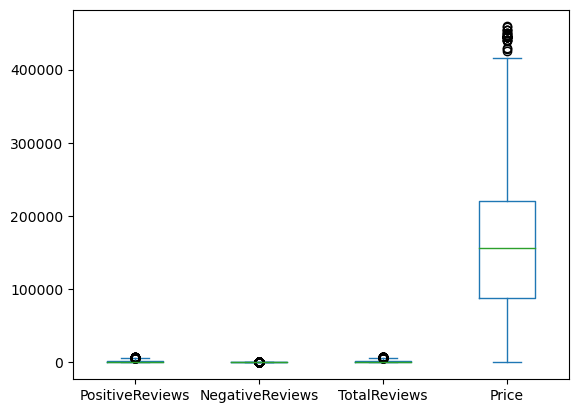

In [ ]:
numeric_cols = ['PositiveReviews', 'NegativeReviews', 'TotalReviews', 'Price']
for col in numeric_cols:
# no_outliers_df = df[numeric_cols].copy()
    df = outlier_detection_iqr(df, col)
df.reset_index(inplace=True, drop=True)
df[numeric_cols].plot(kind='box')

## Kiểm tra xem có bao nhiêu thể loại (Genre) từ những game ta đọc được?
- Việc này sẽ giúp ta lựa chọn kiểu encoding cho các dữ liệu categorical một cách hợp lí.

Trước hết ta sẽ kiểm tra xem những giá trị unique trong `Genre`:

In [ ]:
def get_unique_values(feature):
    temp = df[feature]
    feature_as_str = ', '.join(temp).split(', ')
    feature_as_str = set(feature_as_str)
    return len(feature_as_str)

Lấy số lượng các unique `Genre`: 

In [ ]:
unique_genres = get_unique_values('Genre')
print(f'Số lượng unique genre: {unique_genres}')

Số lượng unique genre: 22


Ta thử kiểm tra xem những genre được phân bố như thế nào:

In [ ]:
def get_distributed_cat(feature):
    temp = df[feature]
    feature_as_str = ', '.join(temp).split(', ')
    distributed_dict = {}
    
    for index, item in temp.items():
        
        for element in item.split(', '):
            if element in distributed_dict:
                # If this tag already existed in the dictionary, increase the count
                distributed_dict[element] += 1
            else:
                # Else add the tag in the dictionary with count 1
                distributed_dict[element] = 1
        
    return distributed_dict

{'Indie': 1734, 'Adventure': 1159, 'Action': 1078, 'Simulation': 824, 'Casual': 795, 'Strategy': 691, 'RPG': 637, 'Early Access': 370, 'Sports': 126, 'Racing': 108, 'Free to Play': 70, 'Massively Multiplayer': 42, 'Utilities': 26, 'Design & Illustration': 16, 'Animation & Modeling': 13, 'Video Production': 9, 'Game Development': 8, 'Web Publishing': 7, 'Audio Production': 6, 'Education': 6, 'Software Training': 4, 'Photo Editing': 3}


<Axes: title={'center': 'Phân bố genre'}>

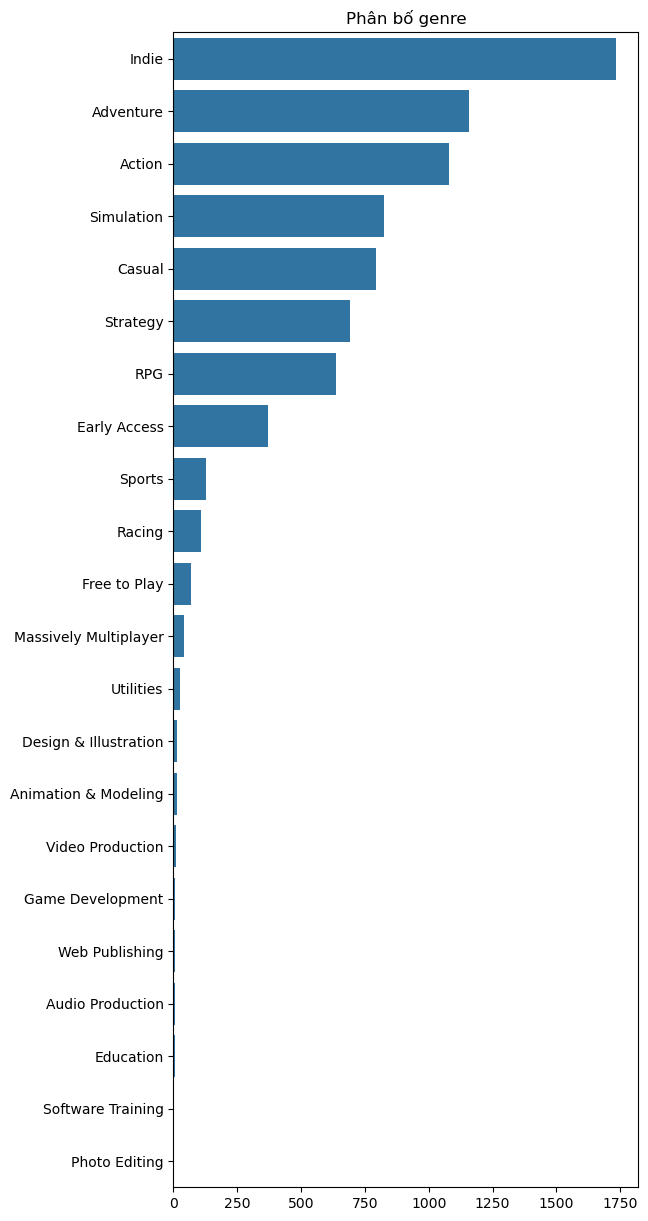

In [ ]:
distributed_genre = get_distributed_cat('Genre')
distributed_genre = dict(sorted(distributed_genre.items(), key=lambda item: item[1],reverse=True))
print(distributed_genre)
f, ax = plt.subplots(figsize=(6, 15))
plt.title("Phân bố genre")
sns.barplot(x=list(distributed_genre.values()), y=list(distributed_genre.keys()), ax=ax)

Nhìn trên biểu đồ, ta thấy số lượng game có genre là `Indie` chiếm rất nhiều, trong khi đó một số genre chỉ được chỉ có trong 1 game mà chúng ta đã thu thập.

Tiếp theo ta thử kiểm tra số lượng các `Tags` như thế nào:

In [ ]:
unique_tags = get_unique_values('Tags')
print(f'Số lượng unique tag: {unique_tags}')

Số lượng unique tag: 436


Số lượng tag là 358, quá nhiều để thể hiện lên trên biểu đồ. Do đó ta sẽ chỉ lấy những tag có phân bố lớn nhất (khoảng 20) để vẽ biểu đồ:

<Axes: title={'center': 'Phân bố tag'}>

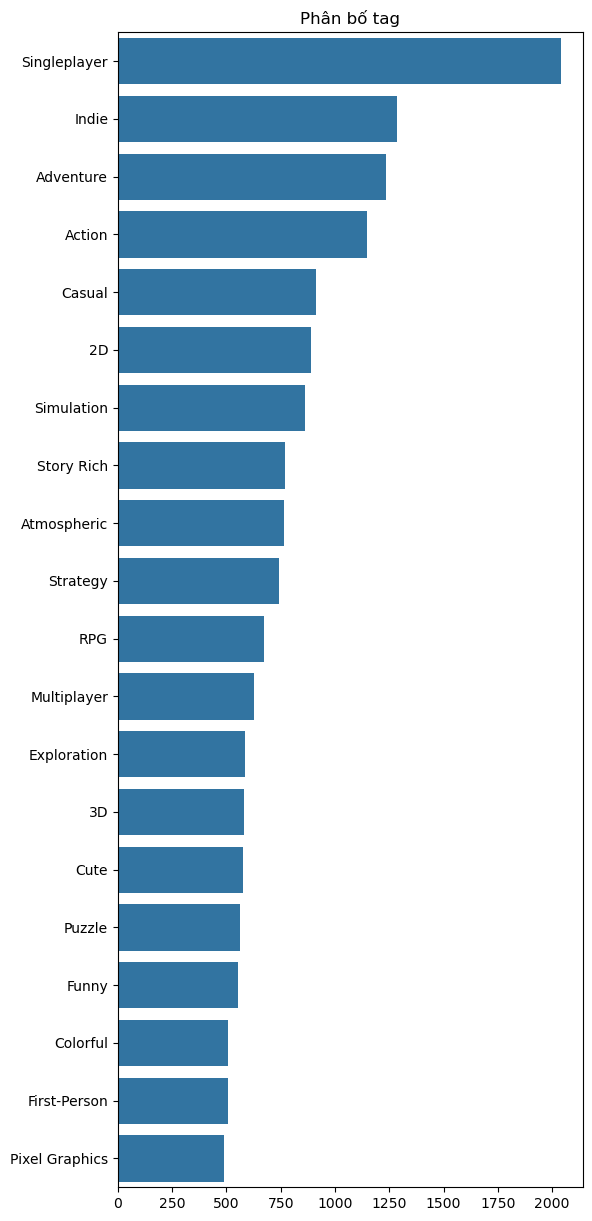

In [ ]:
distributed_tag = get_distributed_cat('Tags')
distributed_tag = dict(sorted(distributed_tag.items(), key=lambda item: item[1], reverse=True))
# print(distributed_tag)
f, ax = plt.subplots(figsize=(6, 15))
plt.title("Phân bố tag")
sns.barplot(x=list(distributed_tag.values())[:20], y=list(distributed_tag.keys())[:20], ax=ax)

Theo như quan sát và tìm hiểu, thì `Genre` được phân loại theo đặc trưng chính và tổng quát của game, còn `Tags` là phân loại theo các yếu tố, nội dung trong game một cách chi tiết hơn.\
Hơn nữa do số lượng tag quá lớn có thể dẫn đến khó encode và ảnh hưởng đến hiệu năng của mô hình, ta nên drop nó và chỉ cần giữ lại `Genre`.

In [ ]:
df.drop('Tags', axis=1, inplace=True)
df

,Title,Genre,withDLC,isMature,ReleaseDate,Developer,Publisher,Languages,PositiveReviews,TotalReviews,NegativeReviews,Price
0,Endless Monday: Dreams and Deadlines,"Adventure, Indie",False,False,2023-05-04,hcnone,hcnone,"English, Japanese",737,737,0,142000.0
1,Papa's Freezeria Deluxe,"Action, Casual, Indie, Simulation, Strategy",False,False,2023-03-31,Flipline Studios,Flipline Studios,English,6514,6562,48,87500.0
2,Cats Hidden in Jingle Jam,"Casual, Indie, Free to Play",False,False,2023-12-01,Travellin Cats,Travellin Cats,"English, French, Italian, German, Spanish - Sp...",5097,5108,11,0.0
3,An Arcade Full of Cats,"Casual, Indie, Free to Play",True,False,2023-11-16,Devcats,Devcats,"English, French, Italian, German, Spanish - Sp...",3018,3045,27,0.0
4,Ib,"Adventure, Indie",False,False,2022-04-11,kouri,PLAYISM,"English, Japanese, Simplified Chinese, Traditi...",3068,3098,30,150000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2719,The Will of Arthur Flabbington,"Adventure, Indie",False,False,2023-11-10,Gugames,Gugames,"English, Italian",61,61,0,170000.0
2720,Suika Shapes,"Action, Casual",False,False,2023-11-27,Zanthous,Zanthous,"English, Japanese",34,34,0,59000.0
2721,Mediterranea Inferno,Adventure,True,True,2023-08-24,Eyeguys,Santa Ragione,"English, French, Italian, German, Spanish - Spain",36,36,0,137350.0
2722,TOSS!🍌,"Action, Adventure, Casual, Indie, Sports",False,False,2023-09-07,Agera Games,Vertigo Games,"English, French, Italian, German, Japanese, Si...",40,40,0,131600.0


## Số hóa các feature

Ở đây, ta sẽ bắt đầu số hóa các dữ liệu category, datetime và boolean để chuẩn bị cho huấn luyện mô hình

Đầu tiên là số hóa cột datetime và boolean:

In [ ]:
df[['withDLC', 'isMature']] = df[['withDLC', 'isMature']].replace({True: 1, False: 0})
df['ReleaseYear'] = df['ReleaseDate'].dt.year
df['ReleaseMonth'] = df['ReleaseDate'].dt.month
df['ReleaseDay'] = df['ReleaseDate'].dt.day

Sau khi số hóa cột datetime, ta tiến hành drop cột `ReleaseDate`:

In [ ]:
df.drop('ReleaseDate', axis=1, inplace=True)
df

,Title,Genre,withDLC,isMature,Developer,Publisher,Languages,PositiveReviews,TotalReviews,NegativeReviews,Price,ReleaseYear,ReleaseMonth,ReleaseDay
0,Endless Monday: Dreams and Deadlines,"Adventure, Indie",0,0,hcnone,hcnone,"English, Japanese",737,737,0,142000.0,2023,5,4
1,Papa's Freezeria Deluxe,"Action, Casual, Indie, Simulation, Strategy",0,0,Flipline Studios,Flipline Studios,English,6514,6562,48,87500.0,2023,3,31
2,Cats Hidden in Jingle Jam,"Casual, Indie, Free to Play",0,0,Travellin Cats,Travellin Cats,"English, French, Italian, German, Spanish - Sp...",5097,5108,11,0.0,2023,12,1
3,An Arcade Full of Cats,"Casual, Indie, Free to Play",1,0,Devcats,Devcats,"English, French, Italian, German, Spanish - Sp...",3018,3045,27,0.0,2023,11,16
4,Ib,"Adventure, Indie",0,0,kouri,PLAYISM,"English, Japanese, Simplified Chinese, Traditi...",3068,3098,30,150000.0,2022,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,The Will of Arthur Flabbington,"Adventure, Indie",0,0,Gugames,Gugames,"English, Italian",61,61,0,170000.0,2023,11,10
2720,Suika Shapes,"Action, Casual",0,0,Zanthous,Zanthous,"English, Japanese",34,34,0,59000.0,2023,11,27
2721,Mediterranea Inferno,Adventure,1,1,Eyeguys,Santa Ragione,"English, French, Italian, German, Spanish - Spain",36,36,0,137350.0,2023,8,24
2722,TOSS!🍌,"Action, Adventure, Casual, Indie, Sports",0,0,Agera Games,Vertigo Games,"English, French, Italian, German, Japanese, Si...",40,40,0,131600.0,2023,9,7


Tiếp theo ta encode cột `Genre` bằng **one hot encoding**:


In [ ]:
# pd.get_dummies(df['Genre'])
one_hot_df = df['Genre'].copy()

one_hot_df = one_hot_df.str.split(', ')
one_hot_df = one_hot_df.explode()
one_hot_df = pd.get_dummies(one_hot_df, prefix='Genre_')
one_hot_df = one_hot_df.groupby(level=0).sum()
one_hot_df[one_hot_df > 0] = 1

In [ ]:
df = pd.merge(df, one_hot_df, left_index=True, right_index=True)
df.drop('Genre', axis=1, inplace=True)
df

,Title,withDLC,isMature,Developer,Publisher,Languages,PositiveReviews,TotalReviews,NegativeReviews,Price,...,Genre__Photo Editing,Genre__RPG,Genre__Racing,Genre__Simulation,Genre__Software Training,Genre__Sports,Genre__Strategy,Genre__Utilities,Genre__Video Production,Genre__Web Publishing
0,Endless Monday: Dreams and Deadlines,0,0,hcnone,hcnone,"English, Japanese",737,737,0,142000.0,...,0,0,0,0,0,0,0,0,0,0
1,Papa's Freezeria Deluxe,0,0,Flipline Studios,Flipline Studios,English,6514,6562,48,87500.0,...,0,0,0,1,0,0,1,0,0,0
2,Cats Hidden in Jingle Jam,0,0,Travellin Cats,Travellin Cats,"English, French, Italian, German, Spanish - Sp...",5097,5108,11,0.0,...,0,0,0,0,0,0,0,0,0,0
3,An Arcade Full of Cats,1,0,Devcats,Devcats,"English, French, Italian, German, Spanish - Sp...",3018,3045,27,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Ib,0,0,kouri,PLAYISM,"English, Japanese, Simplified Chinese, Traditi...",3068,3098,30,150000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,The Will of Arthur Flabbington,0,0,Gugames,Gugames,"English, Italian",61,61,0,170000.0,...,0,0,0,0,0,0,0,0,0,0
2720,Suika Shapes,0,0,Zanthous,Zanthous,"English, Japanese",34,34,0,59000.0,...,0,0,0,0,0,0,0,0,0,0
2721,Mediterranea Inferno,1,1,Eyeguys,Santa Ragione,"English, French, Italian, German, Spanish - Spain",36,36,0,137350.0,...,0,0,0,0,0,0,0,0,0,0
2722,TOSS!🍌,0,0,Agera Games,Vertigo Games,"English, French, Italian, German, Japanese, Si...",40,40,0,131600.0,...,0,0,0,0,0,1,0,0,0,0


Kiểm tra những ngôn ngữ phổ biến trong game:

<Axes: title={'center': 'Tính phân bố các ngôn ngữ trong dữ liệu'}>

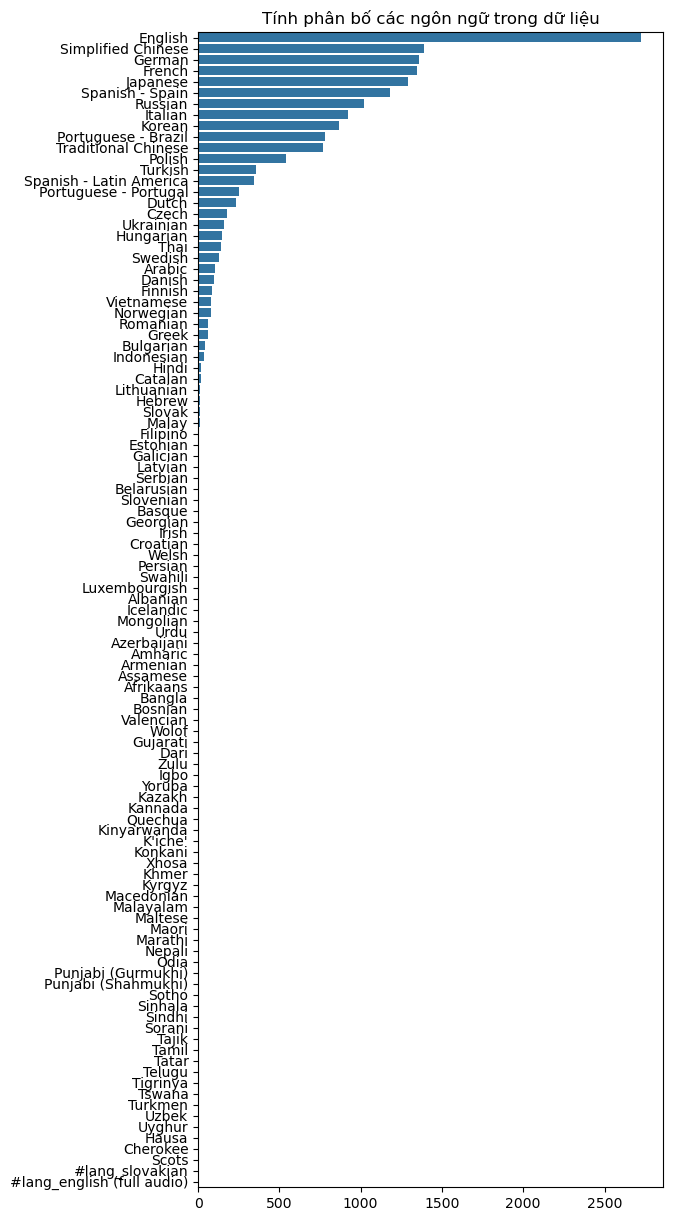

In [ ]:
distributed_lan = get_distributed_cat('Languages')
distributed_lan = dict(sorted(distributed_lan.items(), key=lambda item: item[1], reverse=True))
# print(distributed_tag)
f, ax = plt.subplots(figsize=(6, 15))
plt.title("Tính phân bố các ngôn ngữ trong dữ liệu")
sns.barplot(x=list(distributed_lan.values()), y=list(distributed_lan.keys()), ax=ax)

Như ta thấy, `English` vẫn là ngôn ngữ chính trong hầu hết các game, và hầu hết người chơi nếu không có ngôn ngữ bản địa sẽ sử dụng `English` là chủ yếu, và nếu không có `English` hay ngôn ngữ bản địa của họ, sẽ khó để game đó có thể tiếp cận đến người dùng, ảnh hưởng đến đánh giá của game.\
Do đó, ta có thể chỉ cần tạo một cột kiểm tra xem có ngôn ngữ `English` hay không:

In [ ]:
df['HasEnglish'] = df['Languages'].apply(lambda x: 1 if 'English' in x.split(', ') else 0)
df.drop('Languages', axis=1, inplace=True)
df

,Title,withDLC,isMature,Developer,Publisher,PositiveReviews,TotalReviews,NegativeReviews,Price,ReleaseYear,...,Genre__RPG,Genre__Racing,Genre__Simulation,Genre__Software Training,Genre__Sports,Genre__Strategy,Genre__Utilities,Genre__Video Production,Genre__Web Publishing,HasEnglish
0,Endless Monday: Dreams and Deadlines,0,0,hcnone,hcnone,737,737,0,142000.0,2023,...,0,0,0,0,0,0,0,0,0,1
1,Papa's Freezeria Deluxe,0,0,Flipline Studios,Flipline Studios,6514,6562,48,87500.0,2023,...,0,0,1,0,0,1,0,0,0,1
2,Cats Hidden in Jingle Jam,0,0,Travellin Cats,Travellin Cats,5097,5108,11,0.0,2023,...,0,0,0,0,0,0,0,0,0,1
3,An Arcade Full of Cats,1,0,Devcats,Devcats,3018,3045,27,0.0,2023,...,0,0,0,0,0,0,0,0,0,1
4,Ib,0,0,kouri,PLAYISM,3068,3098,30,150000.0,2022,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,The Will of Arthur Flabbington,0,0,Gugames,Gugames,61,61,0,170000.0,2023,...,0,0,0,0,0,0,0,0,0,1
2720,Suika Shapes,0,0,Zanthous,Zanthous,34,34,0,59000.0,2023,...,0,0,0,0,0,0,0,0,0,1
2721,Mediterranea Inferno,1,1,Eyeguys,Santa Ragione,36,36,0,137350.0,2023,...,0,0,0,0,0,0,0,0,0,1
2722,TOSS!🍌,0,0,Agera Games,Vertigo Games,40,40,0,131600.0,2023,...,0,0,0,0,1,0,0,0,0,1


Kiểm tra xem cột `HasEnglish` có giá trị khác 1 không:

In [ ]:
df[df['HasEnglish'] != 1]

,Title,withDLC,isMature,Developer,Publisher,PositiveReviews,TotalReviews,NegativeReviews,Price,ReleaseYear,...,Genre__RPG,Genre__Racing,Genre__Simulation,Genre__Software Training,Genre__Sports,Genre__Strategy,Genre__Utilities,Genre__Video Production,Genre__Web Publishing,HasEnglish


Không có game nào là không có `English`, Do đó cột này không có giá trị gì để tính điểm.\
Ta sẽ loại bỏ cột này:

In [ ]:
df.drop('HasEnglish', axis=1, inplace=True)
df

,Title,withDLC,isMature,Developer,Publisher,PositiveReviews,TotalReviews,NegativeReviews,Price,ReleaseYear,...,Genre__Photo Editing,Genre__RPG,Genre__Racing,Genre__Simulation,Genre__Software Training,Genre__Sports,Genre__Strategy,Genre__Utilities,Genre__Video Production,Genre__Web Publishing
0,Endless Monday: Dreams and Deadlines,0,0,hcnone,hcnone,737,737,0,142000.0,2023,...,0,0,0,0,0,0,0,0,0,0
1,Papa's Freezeria Deluxe,0,0,Flipline Studios,Flipline Studios,6514,6562,48,87500.0,2023,...,0,0,0,1,0,0,1,0,0,0
2,Cats Hidden in Jingle Jam,0,0,Travellin Cats,Travellin Cats,5097,5108,11,0.0,2023,...,0,0,0,0,0,0,0,0,0,0
3,An Arcade Full of Cats,1,0,Devcats,Devcats,3018,3045,27,0.0,2023,...,0,0,0,0,0,0,0,0,0,0
4,Ib,0,0,kouri,PLAYISM,3068,3098,30,150000.0,2022,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,The Will of Arthur Flabbington,0,0,Gugames,Gugames,61,61,0,170000.0,2023,...,0,0,0,0,0,0,0,0,0,0
2720,Suika Shapes,0,0,Zanthous,Zanthous,34,34,0,59000.0,2023,...,0,0,0,0,0,0,0,0,0,0
2721,Mediterranea Inferno,1,1,Eyeguys,Santa Ragione,36,36,0,137350.0,2023,...,0,0,0,0,0,0,0,0,0,0
2722,TOSS!🍌,0,0,Agera Games,Vertigo Games,40,40,0,131600.0,2023,...,0,0,0,0,0,1,0,0,0,0


Còn hai cột là `Developer` và `Publisher`, ta cũng sẽ kiểm tra tính phân bố của nó:

In [ ]:
temp = df['Publisher'].value_counts()
temp

SEGA                 27
Ubisoft              25
Kagura Games         24
XSEED Games          23
Kairosoft Co.,Ltd    23
                     ..
Pavo Studio           1
Pathea Games          1
Drool                 1
DenchiSoft            1
Zanthous              1
Name: Publisher, Length: 1648, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Developer'] = label_encoder.fit_transform(df['Developer'])
df['Publisher'] = label_encoder.fit_transform(df['Publisher'])
df

,Title,withDLC,isMature,Developer,Publisher,PositiveReviews,TotalReviews,NegativeReviews,Price,ReleaseYear,...,Genre__Photo Editing,Genre__RPG,Genre__Racing,Genre__Simulation,Genre__Software Training,Genre__Sports,Genre__Strategy,Genre__Utilities,Genre__Video Production,Genre__Web Publishing
0,Endless Monday: Dreams and Deadlines,0,0,2022,1581,737,737,0,142000.0,2023,...,0,0,0,0,0,0,0,0,0,0
1,Papa's Freezeria Deluxe,0,0,592,470,6514,6562,48,87500.0,2023,...,0,0,0,1,0,0,1,0,0,0
2,Cats Hidden in Jingle Jam,0,0,1819,1412,5097,5108,11,0.0,2023,...,0,0,0,0,0,0,0,0,0,0
3,An Arcade Full of Cats,1,0,439,359,3018,3045,27,0.0,2023,...,0,0,0,0,0,0,0,0,0,0
4,Ib,0,0,2036,1003,3068,3098,30,150000.0,2022,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,The Will of Arthur Flabbington,0,0,707,563,61,61,0,170000.0,2023,...,0,0,0,0,0,0,0,0,0,0
2720,Suika Shapes,0,0,1999,1558,34,34,0,59000.0,2023,...,0,0,0,0,0,0,0,0,0,0
2721,Mediterranea Inferno,1,1,553,1183,36,36,0,137350.0,2023,...,0,0,0,0,0,0,0,0,0,0
2722,TOSS!🍌,0,0,64,1468,40,40,0,131600.0,2023,...,0,0,0,0,0,1,0,0,0,0


Vậy là cơ bản ta đã hoàn thành số hóa dữ liệu.

# Kiểm tra tính tương quan của dữ liệu (Correlation)

Kiểm tra tính tương quan dữ liệu giúp ta tìm được các mối quan hệ trong dữ liệu để lọc ra những feature phù hợp cho mô hình dự đoán.

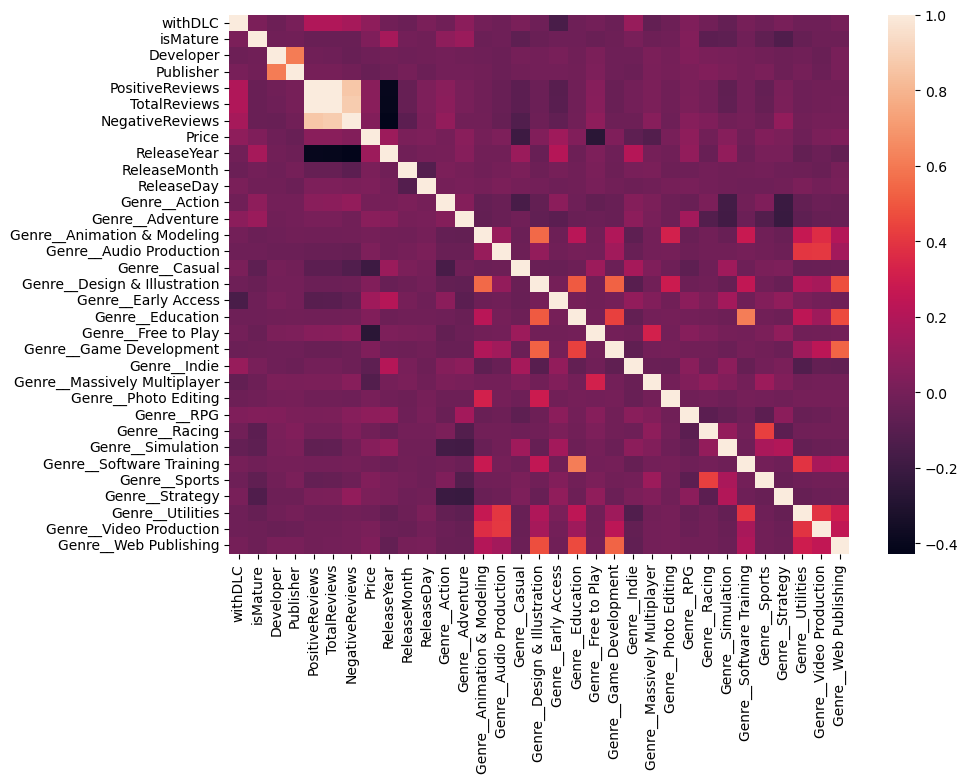

In [ ]:

df_copy = df.copy()
# df_copy = df_copy.drop(df.filter(regex='Genre').columns, axis=1)

# calculate correlation matrix
corr_matrix = df_copy.corr(method='spearman', numeric_only=True)

# plot heatmap graph
plt.subplots(figsize=(10,7))
sns.heatmap(corr_matrix)
plt.show()


Ta thấy các thuộc tính ta vừa kiểm tra giá trị outlier ở trên có giá trị tương quan mạnh (trừ `Price`) được hiển thị trên heatmap. Giờ ta sẽ kiểm tra xem các giá trị này có quan hệ như thế nào.

/home/cheep/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


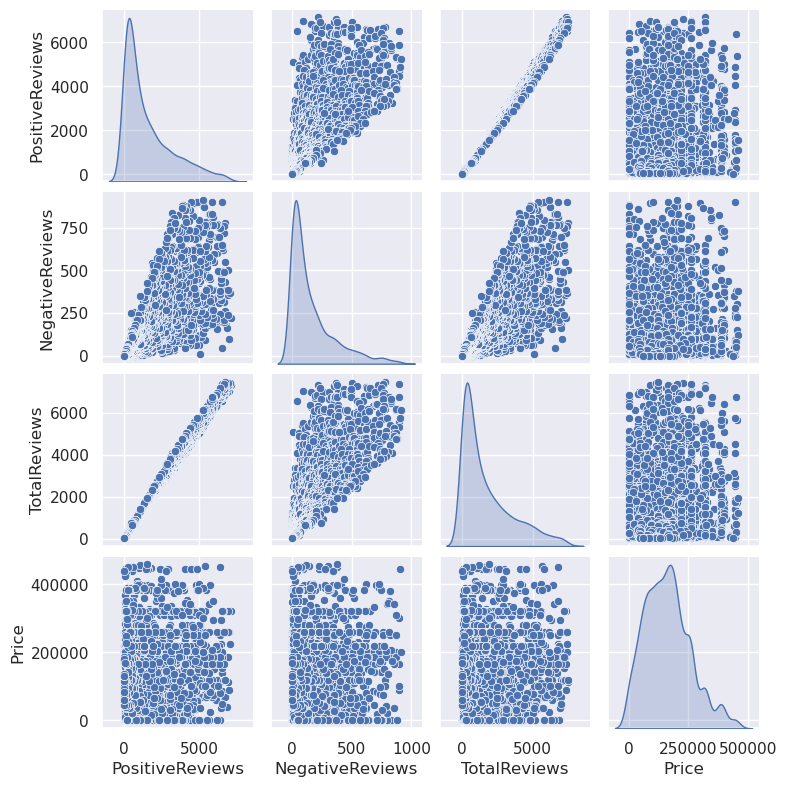

In [ ]:
sns.set()
cols = numeric_cols
sns.pairplot(df[cols], size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

Các thuộc tính `Reviews` khi xét với `Price` rất hỗn loạn, có nghĩa là Price không có mối tương quan mạnh tới các thuộc tính này -> Giá tiền của game không ảnh hưởng đến đánh giá của người dùng.

**`PositiveReviews` và `NegativeReviews` tăng giảm như nào dựa vào số lượng `TotalReviews`?**

<Axes: xlabel='PositiveReviews', ylabel='NegativeReviews'>

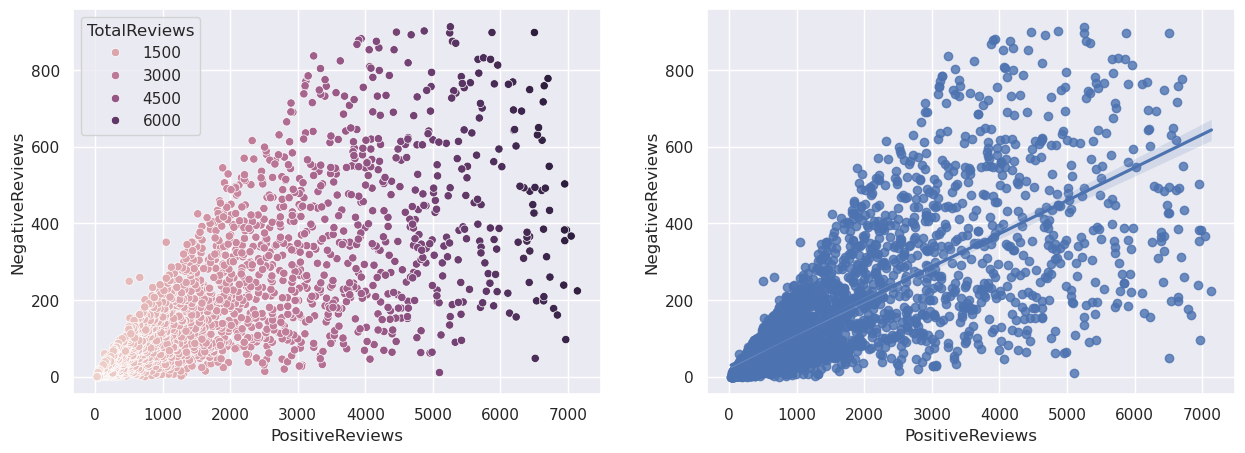

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
sns.scatterplot(x=df['PositiveReviews'], y=df['NegativeReviews'], hue=df['TotalReviews'], ax=axs[0])
sns.regplot(x=df['PositiveReviews'], y=df['NegativeReviews'], ax=axs[1])

Khi `TotalReviews` ít thì các điểm dữ liệu giữa `NegativeReviews` và `PositiveRevies` nằm sát và chi chít lên nhau, chứng tỏ trong khoảng này nó có mối tương quan mạnh.\
Khi `TotalReviews` ngày càng lớn dần, thì khoảng cách các điểm dữ liệu ngày càng nằm rời rạc và cách xa đường hồi quy, lượng `PositiveReviews` ngày càng tăng trong khi `NegativeReviews` ngày càng giảm.

Ta thử kiếm tra xem mối quan hệ giữa `NegativeReviews` và `PositiveReviews` dựa vào `isMature` và `withDLC` như thế nào:

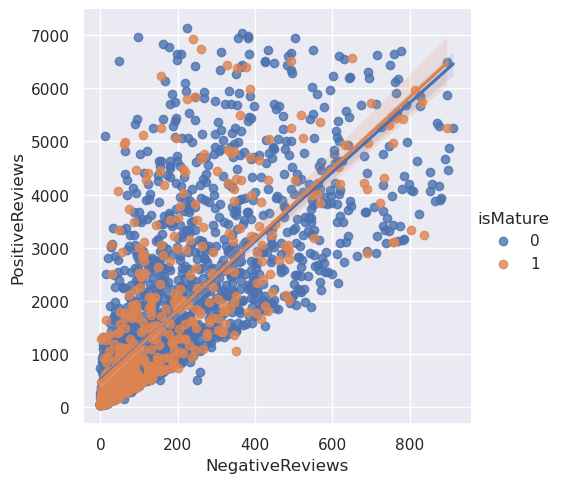

In [ ]:
sns.lmplot(x="NegativeReviews", y="PositiveReviews", hue="isMature", data=df)

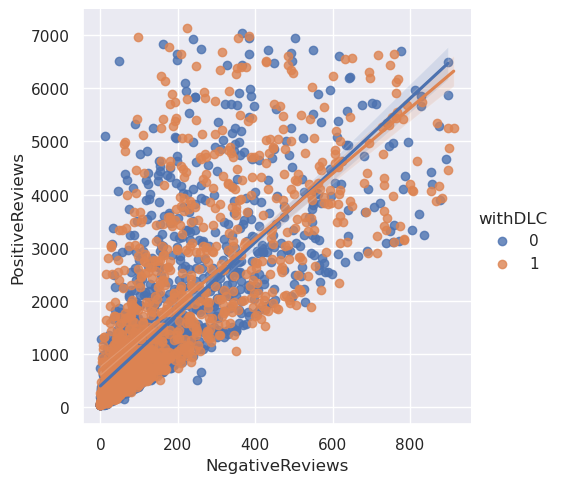

In [ ]:
sns.lmplot(x="NegativeReviews", y="PositiveReviews", hue="withDLC", data=df)

Ta thấy hai đường hồi quy phân loại theo `withDLC` và `isMature` trên mỗi hình sát nhau và gần như là một, do đó những game có **DLC** hay game có **Mature content** không ảnh hưởng quá nhiều khi người chơi đánh giá game.

### Tạo cột tính điểm cho game

##### Ta sẽ sử dụng công thức sau để tính score_rating cho từng trò chơi điện tử dựa trên giá trị ở các cột Reviews với miền giá trị sau khi tính sẽ là [0, 1]
- Total Reviews = Positive Reviews + Negative Reviews
- Review Score = Positive Reviews / Total Reviews
- $$Rating = Review Score - (Review Score - 0.5)*2^{-log_{10}(Total Reviews + 1)}$$


Một số lý do để sử dụng công thức này:
1. Tập trung vào các phản hồi tích cực, có nghĩa là mỗi phản hồi tích cực có tác động lớn hơn trên score_rating so với phản hồi tiêu cực
2. Mặc dù công thức tập trung và nhấn mạnh phản hồi tích cực nhưng không bỏ qua bất kì phản hồi tiêu cực nào
3. Có sự cân bằng khi ta cân nhắc phản hổi tích cực thật sự quan trọng hơn nhưng phản hồi tiêu cực cũng có ảnh hưởng nhất định

In [ ]:
ReviewScore = df['PositiveReviews'] / df['TotalReviews']
df['Rating'] = ReviewScore - (ReviewScore - 0.5) * pow(2, -np.log10(df['TotalReviews'] + 1))
df

,Title,withDLC,isMature,Developer,Publisher,PositiveReviews,TotalReviews,NegativeReviews,Price,ReleaseYear,...,Genre__RPG,Genre__Racing,Genre__Simulation,Genre__Software Training,Genre__Sports,Genre__Strategy,Genre__Utilities,Genre__Video Production,Genre__Web Publishing,Rating
0,Endless Monday: Dreams and Deadlines,0,0,2022,1581,737,737,0,142000.0,2023,...,0,0,0,0,0,0,0,0,0,0.931514
1,Papa's Freezeria Deluxe,0,0,592,470,6514,6562,48,87500.0,2023,...,0,0,1,0,0,1,0,0,0,0.957730
2,Cats Hidden in Jingle Jam,0,0,1819,1412,5097,5108,11,0.0,2023,...,0,0,0,0,0,0,0,0,0,0.959760
3,An Arcade Full of Cats,1,0,439,359,3018,3045,27,0.0,2023,...,0,0,0,0,0,0,0,0,0,0.947230
4,Ib,0,0,2036,1003,3068,3098,30,150000.0,2022,...,0,0,0,0,0,0,0,0,0,0.946714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,The Will of Arthur Flabbington,0,0,707,563,61,61,0,170000.0,2023,...,0,0,0,0,0,0,0,0,0,0.855653
2720,Suika Shapes,0,0,1999,1558,34,34,0,59000.0,2023,...,0,0,0,0,0,0,0,0,0,0.828541
2721,Mediterranea Inferno,1,1,553,1183,36,36,0,137350.0,2023,...,0,0,0,0,0,0,0,0,0,0.831386
2722,TOSS!🍌,0,0,64,1468,40,40,0,131600.0,2023,...,0,0,0,0,1,0,0,0,0,0.836517


**Tiền xử lí hoàn tất, ta xuất dữ liệu ra một file mới chuẩn bị cho giai đoạn học máy:**

In [ ]:
df.to_csv('processed_data.csv', index=False)